#Semantic Role Labeling(SRL)

*From linear sequences to structured semantic representations*

Copyright 2025, Denis Rothman

This notebook provides a hands-on tool to visualize the deep semantic structure of a sentence using Semantic Role Labeling (SRL).

We move beyond seeing language as a one-dimensional linear sequence of words and start architecting it as a multidimensional structure of meaning.

Experiment with the examples below, then try creating your own semantic blueprints. This is a practical step in your context engineering journey.

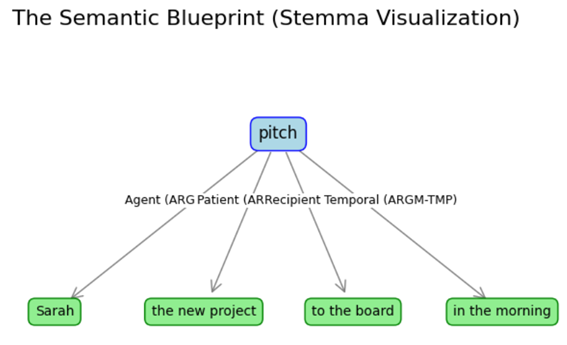

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def _plot_stemma(verb, srl_roles):
    """Internal helper function to generate the stemma visualization."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    verb_style = dict(boxstyle="round,pad=0.5", fc="lightblue", ec="b")
    role_style = dict(boxstyle="round,pad=0.5", fc="lightgreen", ec="g")

    verb_pos = (5, 8.5)
    ax.text(verb_pos[0], verb_pos[1], verb, ha="center", va="center",
            bbox=verb_style, fontsize=12)

    srl_items = list(srl_roles.items())
    num_roles = len(srl_items)
    x_positions = [10 * (i + 1) / (num_roles + 1) for i in range(num_roles)]
    y_position = 4.5

    for i, (role, text) in enumerate(srl_items):
        child_pos = (x_positions[i], y_position)
        ax.text(child_pos[0], child_pos[1], text, ha="center", va="center",
                bbox=role_style, fontsize=10, wrap=True)

        arrow = FancyArrowPatch(
            verb_pos,
            child_pos,
            arrowstyle='->',
            mutation_scale=20,
            shrinkA=15,
            shrinkB=15,
            color='gray'
        )
        ax.add_patch(arrow)

        label_pos = ((verb_pos[0] + child_pos[0]) / 2, (verb_pos[1] + child_pos[1]) / 2 + 0.5)
        ax.text(label_pos[0], label_pos[1], role, ha="center", va="center",
                fontsize=9, color='black', bbox=dict(boxstyle="square,pad=0.1", fc="white", ec="none"))

    fig.suptitle("The Semantic Blueprint (Stemma Visualization)", fontsize=16)
    plt.show()

def visualize_srl(verb, agent=None, patient=None, recipient=None, temporal=None, location=None, manner=None):
    """
    Constructs an SRL dictionary from arguments and generates a stemma visualization.
    """
    srl_roles = {}
    if agent:
        srl_roles["Agent (ARG0)"] = agent
    if patient:
        srl_roles["Patient (ARG1)"] = patient
    if recipient:
        srl_roles["Recipient (ARG2)"] = recipient
    if temporal:
        srl_roles["Temporal (ARGM-TMP)"] = temporal
    if location:
        srl_roles["Location (ARGM-LOC)"] = location
    if manner:
        srl_roles["Manner (ARGM-MNR)"] = manner

    if not srl_roles:
        print("Error: At least one semantic role must be provided.")
        return

    _plot_stemma(verb, srl_roles)

Example 1: A complete action with multiple roles.


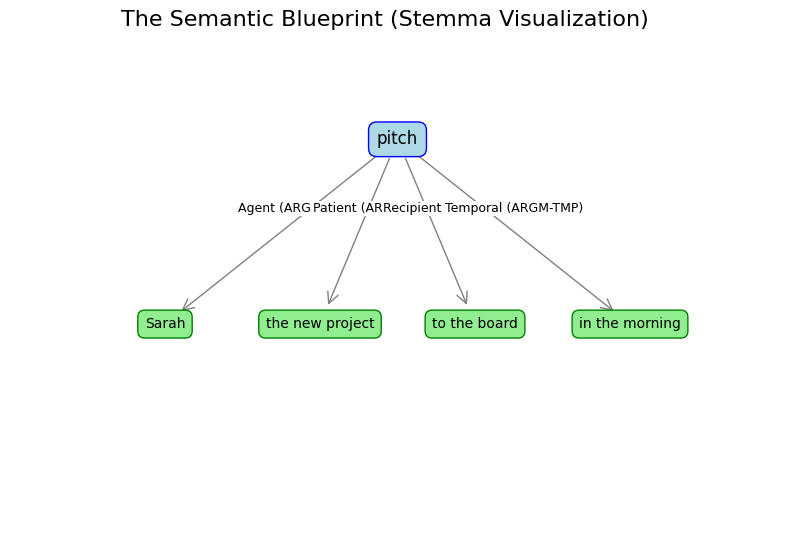


Example 2: An action with a location


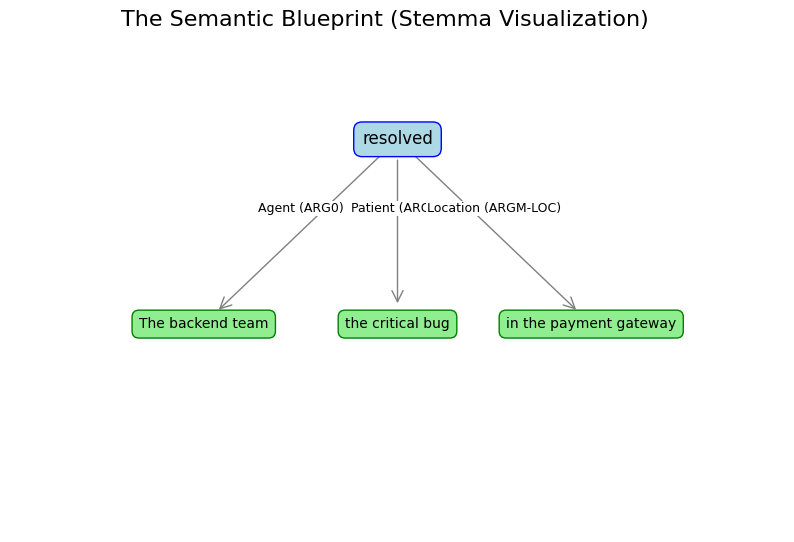


Example 3: Describing how an action was performed


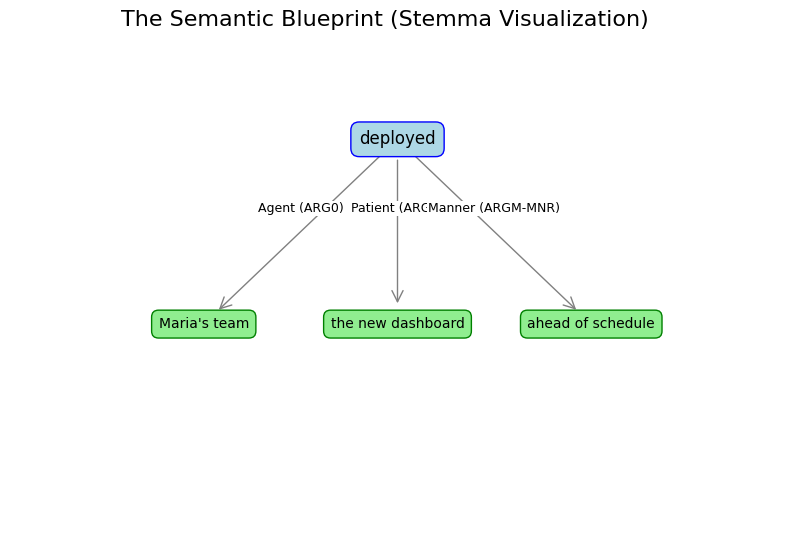

In [ ]:
# --- Example 1:  A complete action with multiple roles ---
print("Example 1: A complete action with multiple roles.")
visualize_srl(
    verb="pitch",
    agent="Sarah",
    patient="the new project",
    recipient="to the board",
    temporal="in the morning"
)

# --- Example 2: An action with a location ---
print("\nExample 2: An action with a location")
visualize_srl(
    verb="resolved",
    agent="The backend team",
    patient="the critical bug",
    location="in the payment gateway"
)


# --- Example 3: Describing how an action was performed ---
print("\nExample 3: Describing how an action was performed")
visualize_srl(
    verb="deployed",
    agent="Maria's team",
    patient="the new dashboard",
    manner="ahead of schedule"
)
